In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [2]:
df= pd.read_csv("../datasets/WineQT.csv")
df=df.drop(columns="Id")
df.head()
df.shape

(1143, 12)

In [3]:
# Descriptive statistics 
df.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311,1.748,4.600,7.100,7.900,9.100,15.900
volatile acidity,1143.0,0.531,0.180,0.120,0.392,0.520,0.640,1.580
citric acid,1143.0,0.268,0.197,0.000,0.090,0.250,0.420,1.000
residual sugar,1143.0,2.532,1.356,0.900,1.900,2.200,2.600,15.500
chlorides,1143.0,0.087,0.047,0.012,0.070,0.079,0.090,0.611
free sulfur dioxide,1143.0,15.615,10.250,1.000,7.000,13.000,21.000,68.000
total sulfur dioxide,1143.0,45.915,32.782,6.000,21.000,37.000,61.000,289.000
density,1143.0,0.997,0.002,0.990,0.996,0.997,0.998,1.004
pH,1143.0,3.311,0.157,2.740,3.205,3.310,3.400,4.010
sulphates,1143.0,0.658,0.170,0.330,0.550,0.620,0.730,2.000


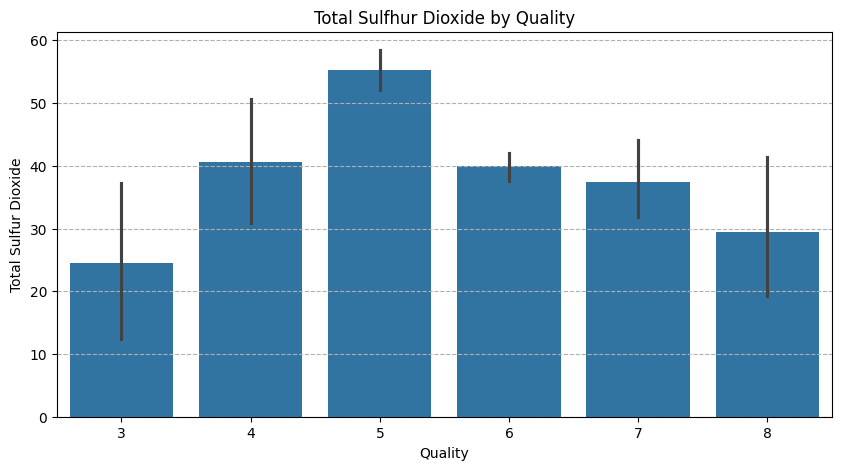

In [4]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the bar chart
sns.barplot(x='quality', y='total sulfur dioxide', data=df, ax=ax)

# Set plot title and axis labels
ax.set_title('Total Sulfhur Dioxide by Quality')
ax.set_xlabel('Quality')
ax.set_ylabel('Total Sulfur Dioxide')

# plot style
ax.grid(True, axis='y', linestyle='--')
sns.set_palette('dark')  


plt.show()

Plot graphs for different variables (columns) to analyze how they impact the wine quality; this will help you in choosing features. 

### Data Cleaning

In [5]:
# check for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

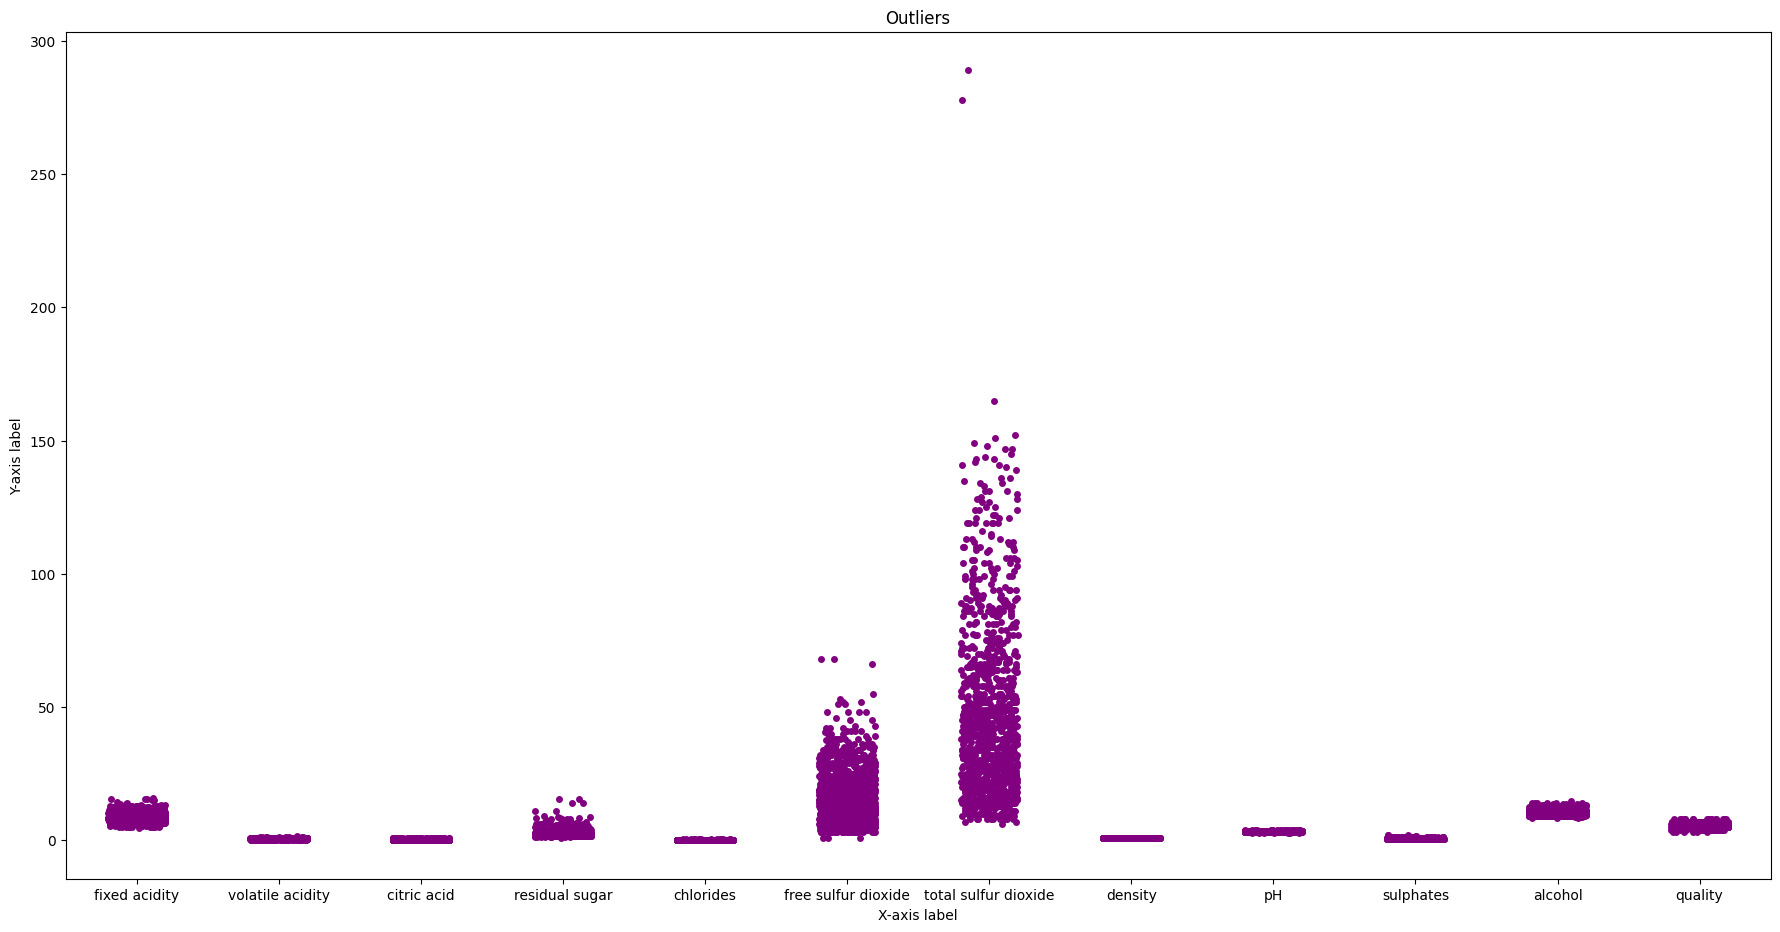

In [6]:
# handling outliers
plt.figure(figsize=(22, 11))

# Add outliers to the plot
sns.stripplot(data=df, color="purple", jitter=0.2, size=5)

# Set the axis labels and title
plt.title("Outliers")
plt.xlabel("X-axis label")
plt.ylabel("Y-axis label")

plt.show()

In [7]:
# removing outliers
z_scores = np.abs(stats.zscore(df))
threshold = 3
df = df[(z_scores < threshold).all(axis=1)]

### Preprocessing

In [8]:
# spliting data into features and target variable
target= df["quality"]
features = df.drop(columns="quality")

#scaling features using standard scaling
scale = StandardScaler()
features_scaled = scale.fit_transform(features)
features = pd.DataFrame(features_scaled, columns=features.columns)

# splitting in test and train
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


### Model Training

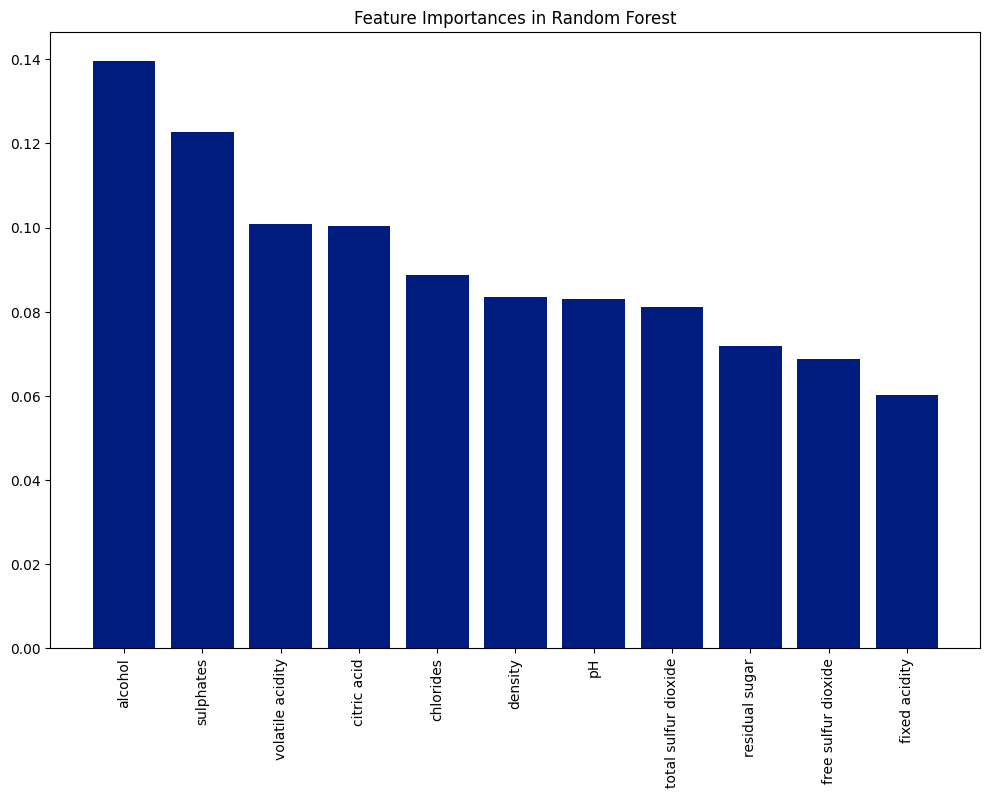

In [9]:
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Extracting Important Features
importances = model.feature_importances_
feature_names = features.columns
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.bar(range(len(importances)), importances[sorted_indices], align="center")
plt.xticks(range(len(importances)), feature_names[sorted_indices], rotation=90)
plt.title("Feature Importances in Random Forest")
plt.show()


### Evaluation

In [10]:
ypred = model.predict(X_test)
cnf= confusion_matrix(y_test, ypred)
print(cnf)
print(classification_report(y_test, ypred, zero_division=0))

[[ 0  2  2  0  0]
 [ 0 64 26  0  0]
 [ 0 25 60  3  0]
 [ 0  0 11 13  0]
 [ 0  0  1  1  1]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         4
           5       0.70      0.71      0.71        90
           6       0.60      0.68      0.64        88
           7       0.76      0.54      0.63        24
           8       1.00      0.33      0.50         3

    accuracy                           0.66       209
   macro avg       0.61      0.45      0.50       209
weighted avg       0.66      0.66      0.65       209



### Improving Performance

In [13]:
# Adressing class Imbalance using `SMOTE`




ModuleNotFoundError: No module named 'imblearn'